In [5]:
import torch
%reset

In [1]:
from src.efficentnet_train import data_load,model_train,visualization,utils
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from src.efficentfacenet import face_descriptor
from torchvision import transforms



In [46]:
dataset_path = "../dataset/preprocessed/lfw_prep"
batch_size=4
stop_n_layers=5

In [5]:
model = face_descriptor.FaceDescriptorModel(download_weights=True, version="efficientnet_b1")
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((240, 240)), data_load.Normalize()])
dataset = data_load.FacesDataset(dataset_path, 1024, transform)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [9]:
#load model weights
model.load_local_weights("weights.pt",cuda_weights=True)

In [44]:
# for i in range(30):
#     _,ax=plt.subplots(1,3)
#     ax[0].set_title("Anchor")
#     ax[0].imshow(a[i])
#
#     ax[1].set_title("Positive")
#     ax[1].imshow(p[i])
#
#     ax[2].set_title("Negative")
#     ax[2].imshow(n[i])

In [7]:
import torch
x=torch.tensor([1,2])
x.unsqueeze(1)


tensor([[1],
        [2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


anchor vs Positive = 1.2934870719909668
anchor vs negative = 2.4857497215270996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


anchor vs Positive = 1.005204439163208
anchor vs negative = 1.1656007766723633


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


anchor vs Positive = 2.099303960800171
anchor vs negative = 0.7240424752235413


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


anchor vs Positive = 1.4144561290740967
anchor vs negative = 3.497011184692383


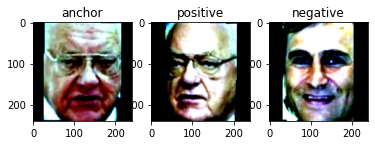

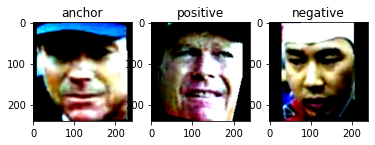

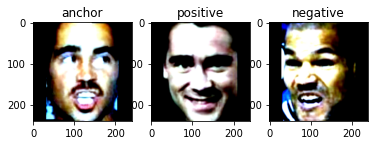

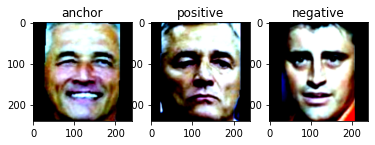

In [18]:
a_batch, p_batch, n_batch = next(iter(train_loader))
model.eval()
with torch.no_grad():
    for i in range(batch_size):

        fig, ax = plt.subplots(1, 3)

        anchor_vector=model(a_batch[i].unsqueeze(0)).detach()[0]
        positive_vector=model(p_batch[i].unsqueeze(0)).detach()[0]
        negative_vector=model(n_batch[i].unsqueeze(0)).detach()[0]

        ax[0].set_title("anchor")
        ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))


        ax[1].set_title("positive")
        ax[1].imshow(p_batch[i].numpy().transpose([1,2,0]))



        ax[2].set_title("negative")
        ax[2].imshow(n_batch[i].numpy().transpose([1,2,0]))




        print(f"anchor vs Positive = {utils.euclidean_distance(anchor_vector.numpy(),positive_vector.numpy())}")
        print(f"anchor vs negative = {utils.euclidean_distance(anchor_vector.numpy(),negative_vector.numpy())}")

TypeError: Invalid shape (3, 240, 240) for image data

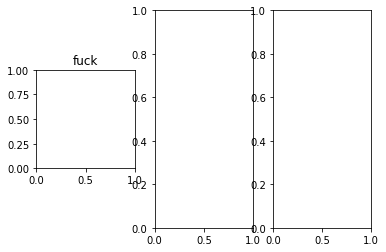

In [19]:
_, ax = plt.subplots(1, 3)
ax[0].set_title("fuck")
ax[0].imshow(a_batch[0])
_.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


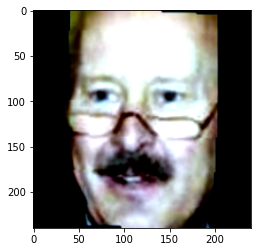

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


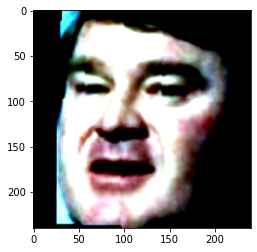

In [5]:
for i in range(batch_size):
  ax,_=plt.subplots(1,3)
  ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))
a = a[0].numpy().transpose([1,2,0])
plt.imshow(a)

In [6]:
for i in range(stop_n_layers):
  for parm in model.features[i].parameters():
    parm.requires_grad=False


In [7]:
train_losses=model_train.train(model,epochs=1000,learn_rate=0.001,train_loader=train_loader,cuda=False)

 epoch 1 [..........] time remaining = 86.14305


KeyboardInterrupt

